In [1]:
# import glob
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
%cd '/content/drive/My Drive/Machine_Learning_MNIST/'

/content/drive/My Drive/Machine_Learning_MNIST


In [3]:
from __future__ import print_function

import os
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import time
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import confusion_matrix

The Localtime is: Mon Jan 25 07:02:32 2021


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


torch.Size([60000, 28, 28])
torch.Size([60000])


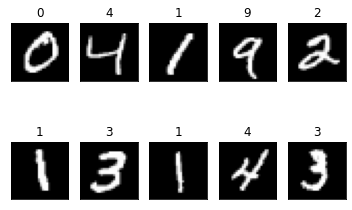

In [4]:
# show localtime
localtime = time.asctime( time.localtime(time.time()) )
print("The Localtime is:", localtime)

# Hyper Parameters
EPOCH = 10  # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 50
LR = 0.001 # learning rate
DOWNLOAD_MNIST = False

# MNIST digits dataset
if not(os.path.exists('./mnist/')) or not os.listdir('./mnist/'):
  # if mnist dir is not created, create a MNIST dir and download MNIST dataset
  DOWNLOAD_MNIST = True

train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,                                     # this is training data
    transform=torchvision.transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,
)

# plot one example
number_of_images_you_want_to_plot = 10
print(train_data.train_data.size())     # (60000, 28, 28)
print(train_data.train_labels.size())   # (60000)

for i in range(1, number_of_images_you_want_to_plot + 1):
  plt.subplot(2, 5, i)
  plt.imshow(train_data.train_data[i].numpy(), cmap='gray')
  plt.title('%i' % train_data.train_labels[i])
  plt.xticks([])
  plt.yticks([])
plt.show()

In [5]:
# pick 2000 samples to speed up testing
train_data = torchvision.datasets.MNIST(root='./mnist/', train=True)
train_x = torch.unsqueeze(train_data.train_data, dim=1).type(torch.FloatTensor)[:60000]/255.   # shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
train_y = train_data.train_labels[:60000]

# pick 2000 samples to speed up testing
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:2000]/255.   # shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = test_data.test_labels[:2000]

print(train_x.size(),train_y.size(),test_x.size(),test_y.size())

train_x = train_x.view(-1,28*28)
test_x = test_x.view(-1,28*28)

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([60000, 1, 28, 28]) torch.Size([60000]) torch.Size([2000, 1, 28, 28]) torch.Size([2000])


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


# K-Nearest Neighbour Classification

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2

trainData = np.array(train_x)
testData = np.array(test_x)
trainLabels = np.array(train_y)
testLabels = np.array(test_y)
valData = testData
valLabels = testLabels

# Checking sizes of each data split
print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k
kVals = range(1, 30, 2)
accuracies = []
'''
*********** Currently Choosing The Best Value of K ***********
When K = 1, accuracy is 96.00%
The Localtime is:  Mon Jan 25 03:56:22 2021
When K = 3, accuracy is 95.80%
The Localtime is:  Mon Jan 25 03:59:52 2021
When K = 5, accuracy is 95.65%
The Localtime is:  Mon Jan 25 04:03:23 2021
When K = 7, accuracy is 95.65%
The Localtime is:  Mon Jan 25 04:06:53 2021
When K = 9, accuracy is 95.00%
The Localtime is:  Mon Jan 25 04:10:24 2021
When K = 11, accuracy is 95.05%
The Localtime is:  Mon Jan 25 04:13:54 2021
When K = 13, accuracy is 94.85%
The Localtime is:  Mon Jan 25 04:17:24 2021
When K = 15, accuracy is 94.50%
The Localtime is:  Mon Jan 25 04:20:53 2021
When K = 17, accuracy is 94.80%
The Localtime is:  Mon Jan 25 04:24:23 2021
When K = 19, accuracy is 94.85%
The Localtime is:  Mon Jan 25 04:27:54 2021
When K = 21, accuracy is 94.70%
The Localtime is:  Mon Jan 25 04:31:24 2021
When K = 23, accuracy is 94.60%
The Localtime is:  Mon Jan 25 04:34:54 2021
When K = 25, accuracy is 94.35%
The Localtime is:  Mon Jan 25 04:38:25 2021
When K = 27, accuracy is 94.30%
The Localtime is:  Mon Jan 25 04:41:57 2021
When K = 29, accuracy is 94.05%
The Localtime is:  Mon Jan 25 04:45:28 2021
k=1 achieved highest accuracy of 96.00% on validation data
'''
# print('*********** Currently Choosing The Best Value of K ***********')

# # loop over kVals
# for k in range(1, 30, 2):
#   # train the classifier with the current value of `k`
#   model = KNeighborsClassifier(n_neighbors=k)
#   model.fit(trainData, trainLabels)

#   # evaluate the model and print the accuracies list
#   score = model.score(valData, valLabels)
#   print("When K = %d, accuracy is %.2f%%" % (k, score * 100))
#   accuracies.append(score)
#   localtime = time.asctime( time.localtime(time.time()) )
#   print("The Localtime is: ", localtime)

# # largest accuracy
# i = np.argmax(accuracies) # np.argmax returns the indices of the maximum values along an axis
# print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i], accuracies[i] * 100))

# Now that I know the best value of k, re-train the classifier
model = KNeighborsClassifier(n_neighbors=1) # kVals[i]
model.fit(trainData, trainLabels)

# Predict labels for the test set
predictions = model.predict(testData)

# Evaluate performance of model for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(testLabels, predictions))

'''
some indices are classified correctly 100% of the time (precision = 1)
high accuracy (98%)
check predictions against images
loop over a few random digits
'''
# image = testData
# j = 0
# for i in np.random.randint(0, high=len(testLabels), size=(24,)):  
#   prediction = model.predict(image)[i]
#   image0 = image[i].reshape((28, 28)).astype("uint8") # convert the image for a 64-dim array to an 8 x 8 image compatible with OpenCV
#   image0 = exposure.rescale_intensity(image0, out_range=(0, 255))
#   plt.subplot(4,6,j+1)
#   plt.title(str(prediction))
#   plt.imshow(image0,cmap='gray')
#   plt.axis('off')
#   j = j+1
# plt.show() 
        
# image0 = imutils.resize(image[0], width=32, inter=cv2.INTER_CUBIC) # then resize it to 32 x 32 pixels for better visualization
# # show the prediction
# print("I think that digit is: {}".format(prediction))
# print('image0 is ',image0)
# cv2.imshow("Image", image0)
# cv2.waitKey(0) # press enter to view each one!


training data points: 60000
validation data points: 2000
testing data points: 2000
EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       175
           1       0.97      0.99      0.98       234
           2       0.99      0.96      0.97       219
           3       0.94      0.96      0.95       207
           4       0.96      0.95      0.96       217
           5       0.93      0.96      0.95       179
           6       0.98      0.98      0.98       178
           7       0.94      0.94      0.94       205
           8       0.98      0.92      0.95       192
           9       0.94      0.94      0.94       194

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



'\nsome indices are classified correctly 100% of the time (precision = 1)\nhigh accuracy (98%)\ncheck predictions against images\nloop over a few random digits\n'

# Logistic Regression Classification

In [7]:
EPOCH = 10               # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 50
LR = 0.001  
DOWNLOAD_MNIST = False

# Mnist digits dataset
if not(os.path.exists('./mnist/')) or not os.listdir('./mnist/'):
  DOWNLOAD_MNIST = True

train_data = torchvision.datasets.MNIST(
  root='./mnist/',
  train=True,                                     # this is training data
  transform=torchvision.transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
  download=DOWNLOAD_MNIST,
)

# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

# pick 2000 samples to speed up testing
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:2000]/255.   # shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = test_data.test_labels[:2000]

class logisticRg(nn.Module):
  def __init__(self):
    super(logisticRg, self).__init__()
    self.lr = nn.Sequential(
        nn.Linear(28*28,10))

  def forward(self, x):
    output = self.lr(x)
    return output, x    # return x for visualization

lor = logisticRg()
print(lor)  # net architecture

optimizer = torch.optim.Adam(lor.parameters(), lr=LR)   # optimize all logistic parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

# training and testing
for epoch in range(EPOCH):
  for step, (b_x, b_y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
    b_x = b_x.view(-1, 28*28)    

    output = lor(b_x)[0]            # logistic output
    loss = loss_func(output, b_y)   # cross entropy loss
    optimizer.zero_grad()           # clear gradients for this training step
    loss.backward()                 # backpropagation, compute gradients
    optimizer.step()                # apply gradients

    if step % 50 == 0:
      test_output, last_layer = lor(test_x.view(-1,28*28))
      pred_y = torch.max(test_output, 1)[1].data.numpy()
      accuracy = float((pred_y == test_y.data.numpy()).astype(int).sum()) / float(test_y.size(0))
      print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)
     
# print 10 predictions from test data
test_output, _ = lor(test_x[:10].view(-1,28*28))
pred_y = torch.max(test_output, 1)[1].data.numpy()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


logisticRg(
  (lr): Sequential(
    (0): Linear(in_features=784, out_features=10, bias=True)
  )
)
Epoch:  0 | train loss: 2.3424 | test accuracy: 0.11
Epoch:  0 | train loss: 1.3019 | test accuracy: 0.75
Epoch:  0 | train loss: 0.8522 | test accuracy: 0.78
Epoch:  0 | train loss: 0.6557 | test accuracy: 0.82
Epoch:  0 | train loss: 0.5167 | test accuracy: 0.83
Epoch:  0 | train loss: 0.5692 | test accuracy: 0.84
Epoch:  0 | train loss: 0.5703 | test accuracy: 0.85
Epoch:  0 | train loss: 0.5245 | test accuracy: 0.85
Epoch:  0 | train loss: 0.4314 | test accuracy: 0.85
Epoch:  0 | train loss: 0.4675 | test accuracy: 0.86
Epoch:  0 | train loss: 0.5557 | test accuracy: 0.86
Epoch:  0 | train loss: 0.3749 | test accuracy: 0.87
Epoch:  0 | train loss: 0.4534 | test accuracy: 0.87
Epoch:  0 | train loss: 0.3840 | test accuracy: 0.87
Epoch:  0 | train loss: 0.2894 | test accuracy: 0.88
Epoch:  0 | train loss: 0.4069 | test accuracy: 0.88
Epoch:  0 | train loss: 0.2029 | test accuracy: 0.88


# Support Vector Machine (SVM) Classification

In [8]:
import argparse
import torchvision
from sklearn import svm
from sklearn.metrics import confusion_matrix

# Load the training data
def MNIST_DATASET_TRAIN(downloads, train_amount):
  # Load dataset
  training_data = torchvision.datasets.MNIST(
      root = './mnist/',
      train = True,
      transform = torchvision.transforms.ToTensor(),
      download = downloads
      ) 

  #Convert Training data to numpy
  train_data = training_data.train_data.numpy()[:train_amount]
  train_label = training_data.train_labels.numpy()[:train_amount]

  # Print training data size
  print('Training data size: ',train_data.shape)
  print('Training data label size:',train_label.shape)    
  train_data = train_data/255.0
  
  return train_data, train_label

# Load the test data
def MNIST_DATASET_TEST(downloads, test_amount):
  testing_data = torchvision.datasets.MNIST(
      root = './mnist/',
      train = False,
      transform = torchvision.transforms.ToTensor(),
      download = downloads
      )
    
  # Convert Testing data to numpy
  test_data = testing_data.test_data.numpy()[:test_amount]
  test_label = testing_data.test_labels.numpy()[:test_amount]
  
  # Print training data size
  print('test data size: ',test_data.shape)
  print('test data label size:',test_label.shape)     
  test_data = test_data/255.0
  
  return test_data, test_label

# Load Training Data & Testing Data
train_data, train_label = MNIST_DATASET_TRAIN(True, 60000)
test_data, test_label = MNIST_DATASET_TEST(True, 2000)

training_features = train_data.reshape(60000,-1)
test_features = test_data.reshape(2000,-1)

# Training SVM
print('------Training and testing SVM------')
clf = svm.SVC(C=5, gamma=0.05,max_iter=10)
clf.fit(training_features, train_label)

#Test on test data
test_result = clf.predict(test_features)
precision = sum(test_result == test_label)/test_label.shape[0]
print('Test precision: ', precision)

#Test on Training data
train_result = clf.predict(training_features)
precision = sum(train_result == train_label)/train_label.shape[0]
print('Training precision: ', precision)

#Show the confusion matrix
matrix = confusion_matrix(test_label, test_result)

Training data size:  (60000, 28, 28)
Training data label size: (60000,)


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


test data size:  (2000, 28, 28)
test data label size: (2000,)
------Training and testing SVM------


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Test precision:  0.5155
Training precision:  0.52875


# Multi-Layer Perceptron Classification

In [9]:
class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.mlp = nn.Sequential(
        nn.Linear(28*28,28*28),
        nn.Linear(28*28,10))

  def forward(self, x):
    output = self.mlp(x)
    return output, x    # return x for visualization

mlp = MLP()
print(mlp)  # net architecture

optimizer = torch.optim.Adam(mlp.parameters(), lr=LR)   # optimize all logistic parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

# training and testing
for epoch in range(EPOCH):
  for step, (b_x, b_y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
    b_x = b_x.view(-1, 28*28)  

    output = mlp(b_x)[0]            # logistic output
    loss = loss_func(output, b_y)   # cross entropy loss
    optimizer.zero_grad()           # clear gradients for this training step
    loss.backward()                 # backpropagation, compute gradients
    optimizer.step()                # apply gradients

    if step % 50 == 0:
      test_output, last_layer = mlp(test_x.view(-1,28*28))
      pred_y = torch.max(test_output, 1)[1].data.numpy()
      accuracy = float((pred_y == test_y.data.numpy()).astype(int).sum()) / float(test_y.size(0))
      print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)
          
# print 10 predictions from test data
test_output, _ = mlp(test_x[:10].view(-1,28*28))
pred_y = torch.max(test_output, 1)[1].data.numpy()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')

MLP(
  (mlp): Sequential(
    (0): Linear(in_features=784, out_features=784, bias=True)
    (1): Linear(in_features=784, out_features=10, bias=True)
  )
)
Epoch:  0 | train loss: 2.3128 | test accuracy: 0.22
Epoch:  0 | train loss: 0.4413 | test accuracy: 0.85
Epoch:  0 | train loss: 0.3303 | test accuracy: 0.86
Epoch:  0 | train loss: 0.2336 | test accuracy: 0.87
Epoch:  0 | train loss: 0.4194 | test accuracy: 0.88
Epoch:  0 | train loss: 0.7033 | test accuracy: 0.86
Epoch:  0 | train loss: 0.2985 | test accuracy: 0.87
Epoch:  0 | train loss: 0.3241 | test accuracy: 0.88
Epoch:  0 | train loss: 0.2732 | test accuracy: 0.88
Epoch:  0 | train loss: 0.1004 | test accuracy: 0.88
Epoch:  0 | train loss: 0.5852 | test accuracy: 0.88
Epoch:  0 | train loss: 0.1024 | test accuracy: 0.88
Epoch:  0 | train loss: 0.3480 | test accuracy: 0.88
Epoch:  0 | train loss: 0.4061 | test accuracy: 0.87
Epoch:  0 | train loss: 0.2526 | test accuracy: 0.89
Epoch:  0 | train loss: 0.1243 | test accuracy: 0.

# Convolutional Neural Network (CNN) Classification

In [10]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    # input shape (1, 28, 28)
    self.conv1 = nn.Sequential(
        nn.Conv2d(
            in_channels=1,              # input height
            out_channels=16,            # n_filters
            kernel_size=5,              # filter size
            stride=1,                   # filter movement/step
            padding=2                   # if want same width and length of this image after Conv2d, padding=(kernel_size-1)/2 if stride=1
            ),                          # output shape (16, 28, 28)
        nn.ReLU(),                      # activation
        nn.MaxPool2d(kernel_size=2)     # choose max value in 2x2 area, output shape (16, 14, 14)
        ) 
    # input shape (16, 14, 14)
    self.conv2 = nn.Sequential(
        nn.Conv2d(16, 32, 5, 1, 2),     # output shape (32, 14, 14)
        nn.ReLU(),                      # activation
        nn.MaxPool2d(2)                 # output shape (32, 7, 7)
        ) 
    self.out = nn.Linear(32 * 7 * 7, 10)# fully connected layer, output 10 classes

  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
    output = self.out(x)
    return output, x                    # return x for visualization

cnn = CNN()
print(cnn)  # net architecture

optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

# training and testing
for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader

        output = cnn(b_x)[0]            # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 50 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.numpy()
            accuracy = float((pred_y == test_y.data.numpy()).astype(int).sum()) / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)
           
# print 10 predictions from test data
test_output, _ = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)
Epoch:  0 | train loss: 2.3145 | test accuracy: 0.12
Epoch:  0 | train loss: 0.6450 | test accuracy: 0.82
Epoch:  0 | train loss: 0.2305 | test accuracy: 0.88
Epoch:  0 | train loss: 0.1928 | test accuracy: 0.90
Epoch:  0 | train loss: 0.1733 | test accuracy: 0.92
Epoch:  0 | train loss: 0.1425 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1165 | test accuracy: 0.94
Epoch:  0 | train loss: 0.0836 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1746 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0340 | test accuracy: 0.9

# Recurrent Neural Network (RNN) Classification

In [11]:
import torch
from torch import nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms

# Hyper Parameters
EPOCH = 1               # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 64
TIME_STEP = 28          # rnn time step / image height
INPUT_SIZE = 28         # rnn input size / image width
LR = 0.01               # learning rate
DOWNLOAD_MNIST = True   # set to True if haven't download the data

# Mnist digital dataset
train_data = dsets.MNIST(
    root='./mnist/',
    train=True,                         # this is training data
    transform=transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,            # download it if you don't have it
)

# plot one example
print(train_data.train_data.size())     # (60000, 28, 28)
print(train_data.train_labels.size())   # (60000)

# Data Loader for easy mini-batch return in training
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

# convert test data into Variable, pick 2000 samples to speed up testing
test_data = dsets.MNIST(root='./mnist/', train=False, transform=transforms.ToTensor())
test_x = test_data.test_data.type(torch.FloatTensor)[:2000]/255.   # shape (2000, 28, 28) value in range(0,1)
test_y = test_data.test_labels.numpy()[:2000]    # covert to numpy array

class RNN(nn.Module):
  def __init__(self):
    super(RNN, self).__init__()

    # if use nn.RNN(), it hardly learns
    self.rnn = nn.LSTM(
        input_size=INPUT_SIZE,
        hidden_size=64,         # rnn hidden unit
        num_layers=1,           # number of rnn layer
        batch_first=True
        )                       # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)

    self.out = nn.Linear(64, 10)

  def forward(self, x):
    r_out, (h_n, h_c) = self.rnn(x, None)   # None represents zero initial hidden state      
    out = self.out(r_out[:, -1, :])         # choose r_out at the last time step
    return out

rnn = RNN()
print(rnn)

optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

# training and testing
for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(train_loader):    # gives batch data
        b_x = b_x.view(-1, 28, 28)                      # reshape x to (batch, time_step, input_size)

        output = rnn(b_x)                               # rnn output
        loss = loss_func(output, b_y)                   # cross entropy loss
        optimizer.zero_grad()                           # clear gradients for this training step
        loss.backward()                                 # backpropagation, compute gradients
        optimizer.step()                                # apply gradients

        if step % 50 == 0:
            test_output = rnn(test_x)                   # (samples, time_step, input_size)
            pred_y = torch.max(test_output, 1)[1].data.numpy()
            accuracy = float((pred_y == test_y).astype(int).sum()) / float(test_y.size)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)

# print 10 predictions from test data
test_output = rnn(test_x[:10].view(-1, 28, 28))
pred_y = torch.max(test_output, 1)[1].data.numpy()
print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

torch.Size([60000, 28, 28])
torch.Size([60000])
RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Epoch:  0 | train loss: 2.3185 | test accuracy: 0.10
Epoch:  0 | train loss: 1.2478 | test accuracy: 0.54
Epoch:  0 | train loss: 0.8551 | test accuracy: 0.69
Epoch:  0 | train loss: 0.6400 | test accuracy: 0.73
Epoch:  0 | train loss: 0.4108 | test accuracy: 0.81
Epoch:  0 | train loss: 0.3168 | test accuracy: 0.87
Epoch:  0 | train loss: 0.3157 | test accuracy: 0.86
Epoch:  0 | train loss: 0.1488 | test accuracy: 0.89
Epoch:  0 | train loss: 0.1660 | test accuracy: 0.92
Epoch:  0 | train loss: 0.1526 | test accuracy: 0.93
Epoch:  0 | train loss: 0.1760 | test accuracy: 0.94
Epoch:  0 | train loss: 0.2752 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1345 | test accuracy: 0.94
Epoch:  0 | train loss: 0.3160 | test accuracy: 0.92
Epoch:  0 | train loss: 0.2366 | test accuracy: 0.92
Epoch:  0 | train loss: 0.0706 | test accuracy: 0.95
Epoch:  0 | train loss: 0.2403 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1124 | test accuracy: 0.94
Epoch:  0 | train loss: 0.2435 | test accuracy